In [446]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

In [447]:
df = pd.read_csv('Storage data.csv', header=0, parse_dates=[0])

In [448]:
df.head()

,Months,Storage
0,Jan-19,790GB
1,Feb-19,1422GB
2,Mar-19,1580GB
3,Apr-19,2054GB
4,May-19,1896GB


In [449]:
import re 
df['Storage']=df['Storage'].apply(lambda x:int (re.match(r'[0-9]*', x).group()))

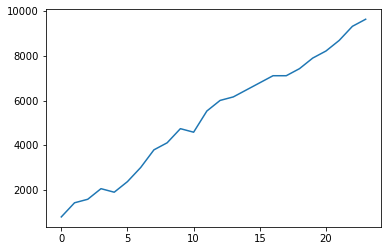

In [450]:
df['Storage'].plot()

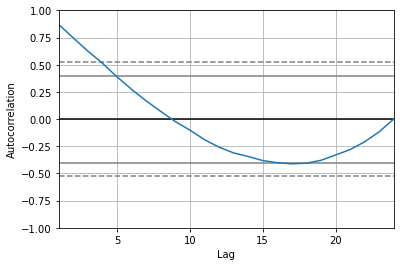

In [451]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Storage'])

In [452]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['Storage'], order=(3,2,1))

In [453]:
model_fit = model.fit()

In [454]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D2.Storage   No. Observations:                   22
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -155.165
Method:                       css-mle   S.D. of innovations            255.966
Date:                Mon, 26 Apr 2021   AIC                            322.330
Time:                        15:45:58   BIC                            328.877
Sample:                             2   HQIC                           323.872
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3860      6.258     -0.221      0.825     -13.651      10.879
ar.L1.D2.Storage    -0.2200      0.209     -1.051      0.293      -0.630       0.190
ar.L2.D2.Storage     0.0086      0.223      0.039      0.969      -0.428       0.445
ar.L3.D2.Storage    -0.1824      0.211     -0.866      0.387      -0.595       0.231
ma.L1.D2.Storage    -0.9999      0.147     -6.793      0.000      -1.288      -0.711
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5233           -0.0000j            1.5233           -0.5000
AR.2            0.7852           -1.7268j            1.8969           -0.1821
AR.3            0.7852           +1.7268j            1.8969            0.1821
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [455]:
residuals = model_fit.resid

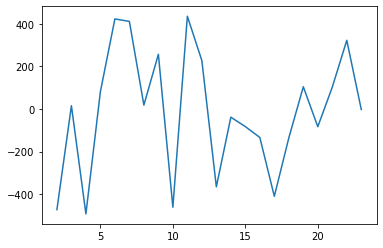

In [456]:
residuals.plot()


In [457]:
residuals.describe()

count     22.000000
mean     -12.950506
std      294.068987
min     -492.917682
25%     -135.555631
50%        6.178329
75%      196.345369
max      435.183351
dtype: float64

In [425]:
from statsmodels.graphics.tsaplots import plot_pacf

In [458]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

In [512]:
X = df['Storage'].values
size = int(len(X) * 0.77)
train, test = X[0:size], X[size:len(X)]

In [513]:
train

array([ 790, 1422, 1580, 2054, 1896, 2370, 3002, 3792, 4108, 4740, 4582,
       5530, 6004, 6162, 6478, 6794, 7110, 7110], dtype=int64)

In [514]:
test

array([7426, 7900, 8216, 8690, 9322, 9638], dtype=int64)

In [515]:
size,len(X)

(18, 24)

predicted=7632.563268, expected=7426.000000
predicted=7831.123744, expected=7900.000000
predicted=8343.457762, expected=8216.000000
predicted=8598.624562, expected=8690.000000
predicted=9010.859446, expected=9322.000000
predicted=9647.176562, expected=9638.000000
Test RMSE: 167.780


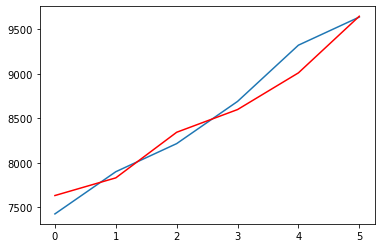

In [516]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [471]:
from statsmodels.graphics.tsaplots import plot_pacf

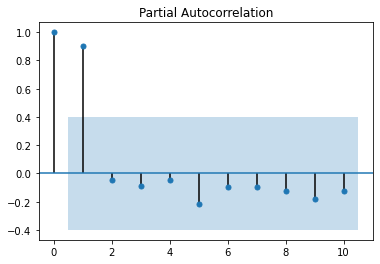

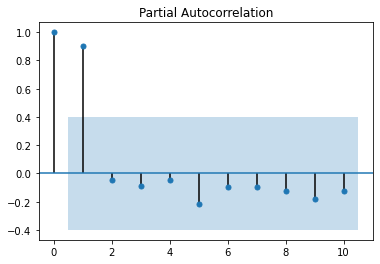

In [463]:
plot_pacf(df['Storage'], lags=10)